**Kuramoto model - Numerical solution**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
N = 3 # number of oscillators
k = 1. # coupling strength

# intrinsic angular frequencies
w1 = 0.
w2 = 0.
w3 = 0.
w = np.array([w1, w2, w3])*2.0*np.pi # vector with the intrinsic angular velocities 

A = np.array([[0, 1, 1],
              [1, 0, 1],
              [1, 1, 0]]) # adjacency matrix

In [3]:
# Derivative of the function (dtheta/dt)
def derivative(t, theta): # theta = (theta1, theta2, theta3,..., thetaN) [vector]
    dtheta = np.zeros(len(theta))
    dtheta += w
    for i in range(len(theta)): # len(theta) = N
        for j in range(len(theta)):          
                dtheta[i] += k * A[i,j]*np.sin(theta[j]-theta[i])   
    return dtheta  

# Runge-Kutta 4 integration method
def rk4_multivariable(t, h, theta0):
    theta_rk4 = np.zeros(len(theta0))
    k1 = derivative(t, theta0)
    k2 = derivative(t, theta0+(h/2.)*k1)
    k3 = derivative(t, theta0+(h/2.)*k2)
    k4 = derivative(t, theta0+h*k3)
    theta_rk4 = theta0 + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)  
    
    for i in range(len(theta_rk4)):        
        # We limit the solution between -pi and pi   
        if np.pi < theta_rk4[i] < 2*np.pi:
            theta_rk4[i] = theta_rk4[i] - 2*np.pi
        if -np.pi < theta_rk4[i] < -2*np.pi:
            theta_rk4[i] = theta_rk4[i] + 2*np.pi         
    return theta_rk4               

In [4]:
# Synchronization order parameter 
def sync_order_parameter(N, theta): #(at a given time t)
    r_var = 0
    for i in range(len(theta)):
        r_var+=np.exp(1j*theta[i])
    r_var = (1./float(N))*r_var
    return r_var   

**DATA PROCESSING**

In [5]:
file = open("results_numerical.txt", "w")
writer = csv.writer(file, delimiter = ' ')

# Initial conditions
t0 = 0
h = 0.0001 # delta t
steps = 100000
theta0 = np.array([1., -0.2, 0.5])*np.pi  # t=0 (theta1, theta2, theta3)
order_p0 = abs(sync_order_parameter(N, theta0))

writer.writerow((t0, theta0[0], theta0[1], theta0[2], order_p0))

# integration over time
for n in range(1, steps):
    t = t0 + n*h # time
    theta = rk4_multivariable(t, h, theta0) # vector with the solution of each time iteration
    theta0 = theta
    r = abs(sync_order_parameter(N, theta)) # modulus of the sync order parameter
    
    writer.writerow(("{:.4f}".format(t), "{:.6f}".format(theta[0]), "{:.6f}".format(theta[1]), "{:.6f}".format(theta[2]), "{:.6f}".format(r)))

file.close()    

In [6]:
N = 3 # number of oscillators
steps = 100000

time = np.zeros(steps)
theta = np.zeros((steps,N))
order_p = np.zeros(steps)

lines = 0 # counter
with open("results_numerical.txt","r") as file1:
    for line in file1:
        line = line.split(' ')
        time[lines] = float(line[0])
        theta[lines]=line[1:4:]
        order_p[lines]=line[4]
        lines+=1 

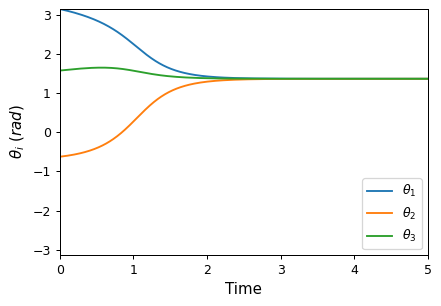

In [7]:
plt.figure(figsize=(5,3.5), dpi=90)
plt.ylabel(r'$\theta_{i} \ (rad)$', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.plot(time,theta[:,0], label=r'$\theta_{1}$')  
plt.plot(time,theta[:,1], label=r'$\theta_{2}$') 
plt.plot(time,theta[:,2], label=r'$\theta_{3}$') 
plt.legend(loc='lower right') #bbox_to_anchor=(1, 0.5)
plt.ylim((-np.pi, np.pi))
plt.xlim((0,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('numerical.png')
plt.show()

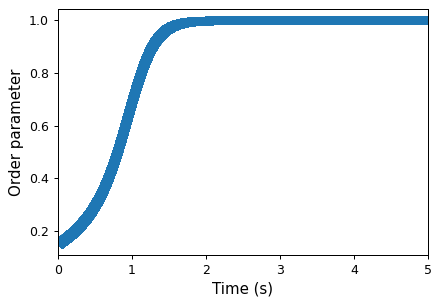

In [10]:
plt.figure(figsize=(5,3.5), dpi=90)
plt.ylabel('Order parameter', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.plot(time,order_p,'x')  
plt.xlim((0,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('order_p_num.png')
plt.show()